Data Source : https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

### Introduction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [26]:
## Importing Important Libraries

import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#### Observing that, the dataset has only numerical type of data, not categorical

In [29]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Describe function in pandas tells us about the min, max, mean and quartiles details of the numeric features in the dataset
### Here, all the values are seems logically correct, there is no negative values in all the features. So,  we can confidently move forward without dropping any feature values

In [30]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Lets now look at the data using some visualization techniques

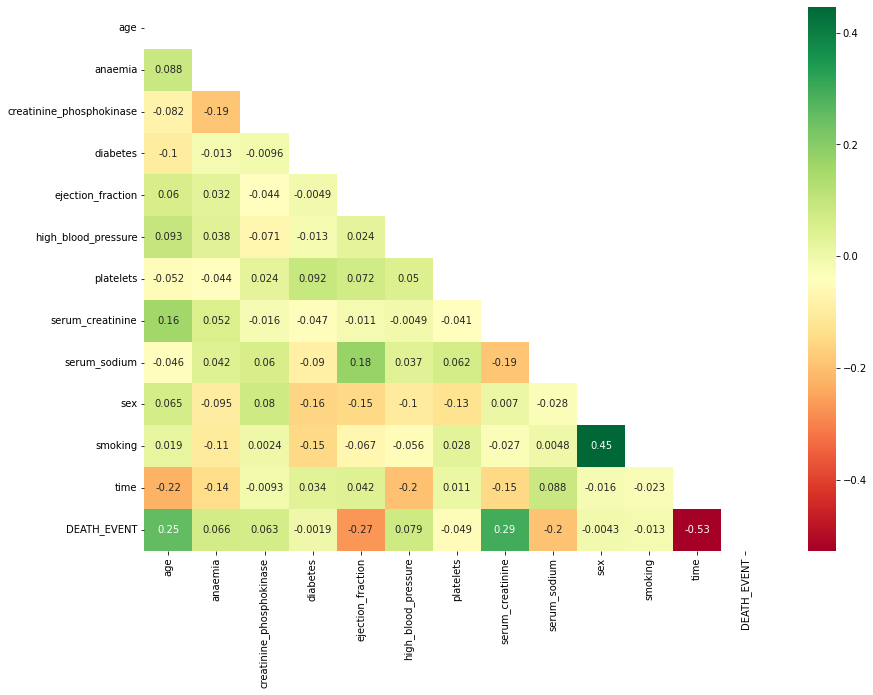

In [31]:
### Correlation matrix
plt.figure(figsize = (14,10))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),cmap="RdYlGn",mask = mask,annot=True)
plt.show()

In [32]:
## Death Events as per Sex

trace1 = go.Bar(x = df.sex, y = df.DEATH_EVENT)

data1 = [trace1]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data1, layout = layout)
iplot(fig)

# here 0 means female and 1 means male

Text(0.5, 1.0, 'Genders')

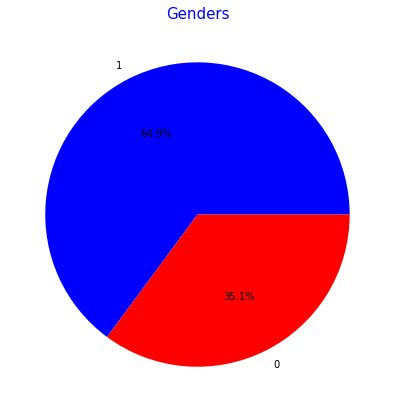

In [33]:
counter_data_sex = Counter(df.sex)
data_most_common_sex = counter_data_sex.most_common(2)
data_most_common_sex = pd.DataFrame(data_most_common_sex)
data_most_common_sex.columns = ["a","b"]
data_most_common_sex

labels = data_most_common_sex.a
colors = ['blue','red']
explode = [0,0]
sizes = data_most_common_sex.b


plt.figure(figsize = (7,7))
plt.pie(sizes,  explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Genders',color = 'blue',fontsize = 15)

In [34]:
trace1 = go.Bar(x = df.smoking, y = df.DEATH_EVENT)

data1 = [trace1]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data1, layout = layout)
iplot(fig)

# Here 0 means smoling, `1 means not smoking`

In [35]:
# Distribution as per anemia or not
trace1 = go.Bar(x = df.anaemia, y = df.DEATH_EVENT)

data1 = [trace1]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data1, layout = layout)
iplot(fig)

Total number of Died:- 85
Total number of Not Died:- 167


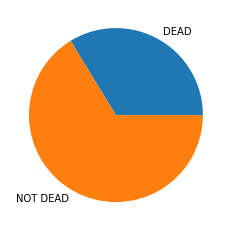

In [36]:
ageabove_50_not_dead = df['DEATH_EVENT'][df.age >=50][df.DEATH_EVENT == 0]
ageabove_50_dead = df['DEATH_EVENT'][df.age >= 50][df.DEATH_EVENT == 1]

len_dead = len(ageabove_50_dead)
len_not_dead = len(ageabove_50_not_dead)

arr1 = np.array([len_dead, len_not_dead])
labels =['DEAD','NOT DEAD']

print(f'Total number of Died:- {len_dead}')
print(f'Total number of Not Died:- {len_not_dead}')

plt.pie(arr1, labels=labels)
plt.show()

In [47]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

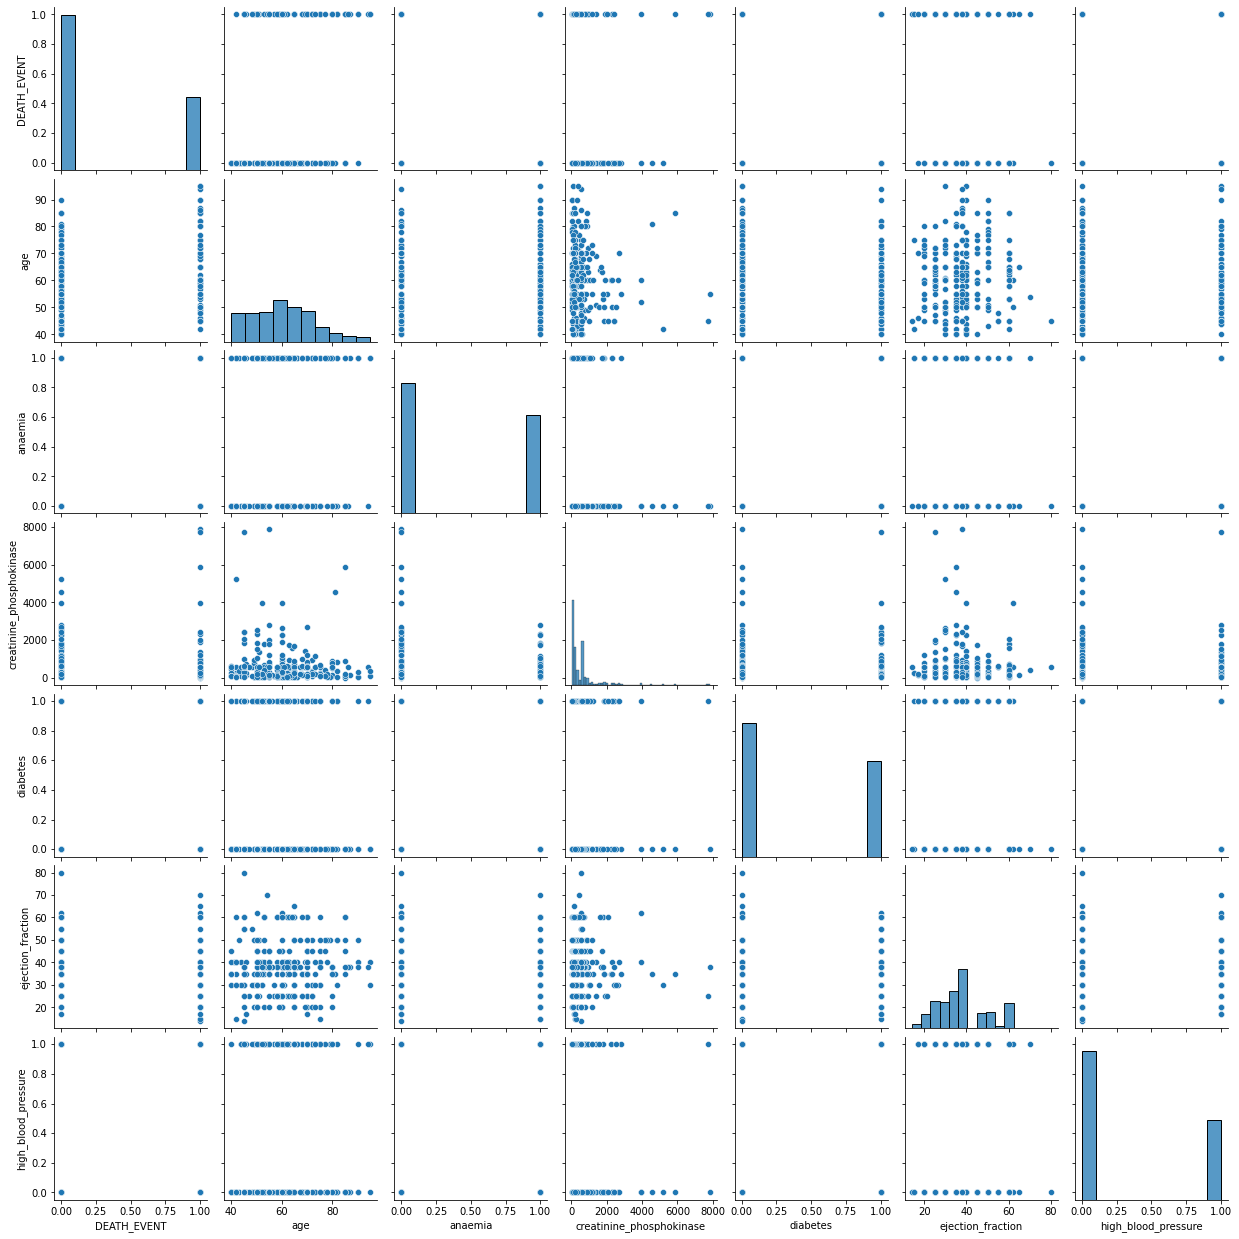

In [49]:
sns.pairplot(df[['DEATH_EVENT','age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure']])

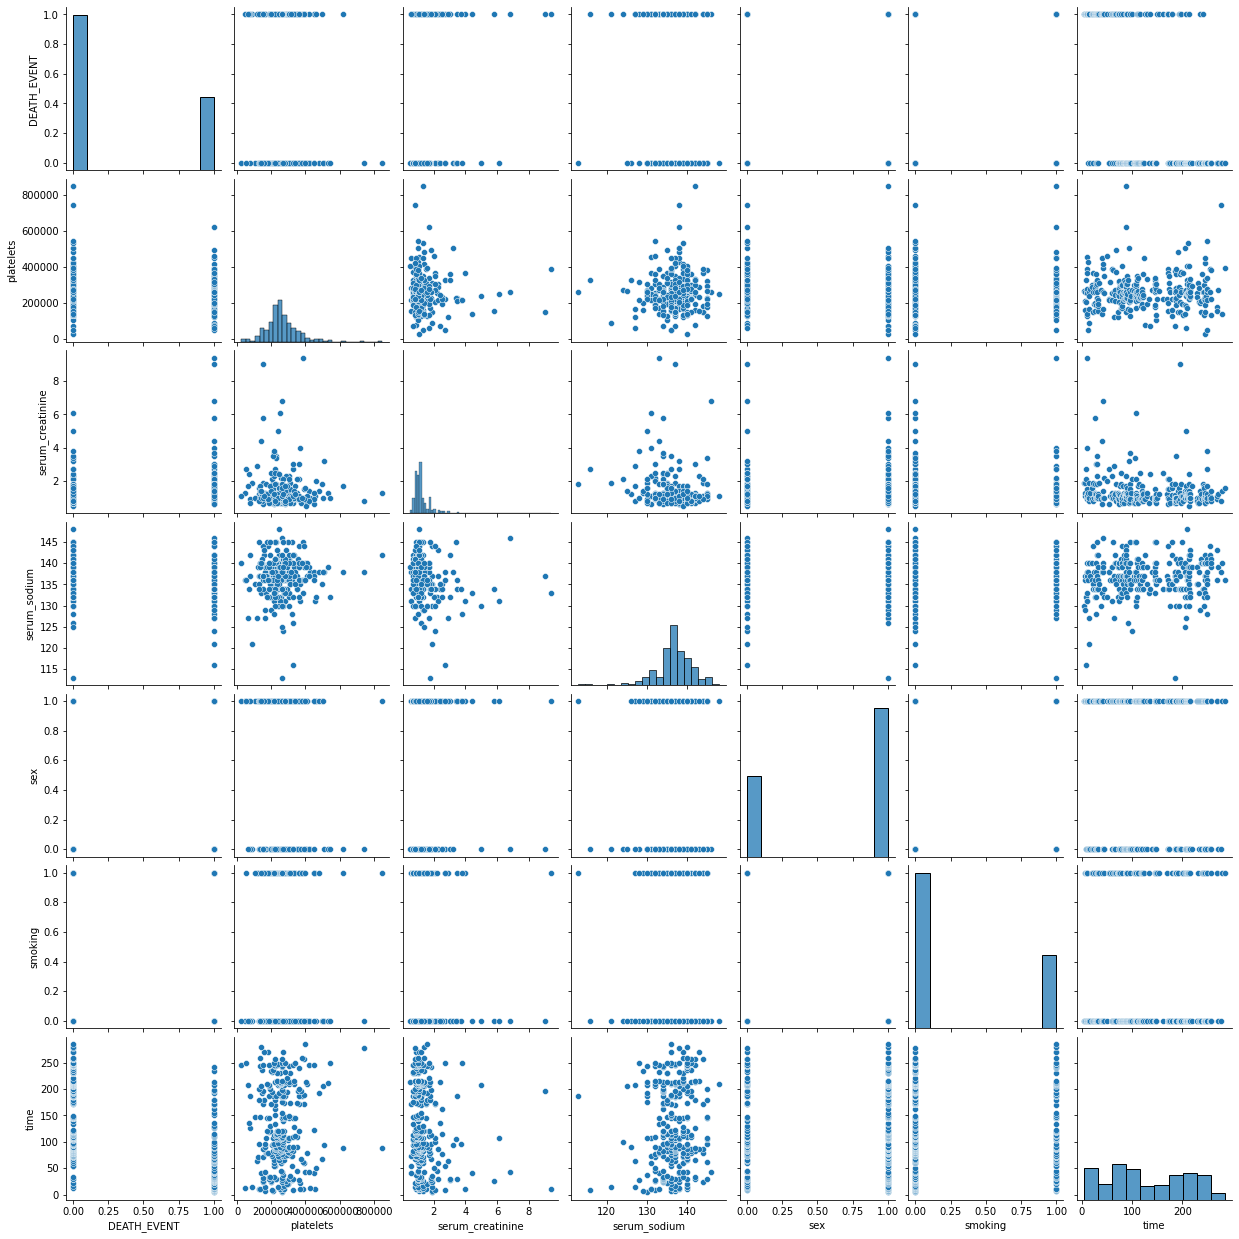

In [50]:
sns.pairplot(df[['DEATH_EVENT','platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']])

## Now Modelling preocess

#### First split dataset into train and test 

In [37]:
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print(f'Shape of the X_train {X_train.shape}')
print(f'Shape of the X_test {X_test.shape}')
print(f'Shape of the y_train {y_train.shape}')
print(f'Shape of the y_test {y_test.shape}')

Shape of the X_train (239, 12)
Shape of the X_test (60, 12)
Shape of the y_train (239,)
Shape of the y_test (60,)


### Now Trying to apply different ML classification algorithms on the train dataset, which we have learnt so far 

### Gaussian Naive Bayes Classifier

In [40]:
from sklearn.naive_bayes import GaussianNB


naive_bayes_classifier = GaussianNB()

# fit the model
naive_bayes_classifier.fit(X_train, y_train)

y_pred_GNB = naive_bayes_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

cm_NB = confusion_matrix(y_test, y_pred_GNB)
print("Confusion Matrix for Gaussian Naive Bayes Classifier:")
print(cm_NB)
clss_report_NB = classification_report(y_test, y_pred_GNB)
print("\nClassification Report for Gaussian Naive Bayes Classifier:",)
print (clss_report_NB)
acc_score_NB = accuracy_score(y_test,y_pred_GNB)


print('Accuracy for Gaussian Naive Bayes Classifier: {0:0.4f}'. format(acc_score_NB))
mse_NB = metrics.mean_squared_error(y_test,y_pred_GNB)
print('Mean Squared Error for Gaussian Naive Bayes Classifier: {0:0.4f}'. format(mse_NB))

Confusion Matrix for Gaussian Naive Bayes Classifier:
[[34  1]
 [15 10]]

Classification Report for Gaussian Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.69      0.97      0.81        35
           1       0.91      0.40      0.56        25

    accuracy                           0.73        60
   macro avg       0.80      0.69      0.68        60
weighted avg       0.78      0.73      0.70        60

Accuracy for Gaussian Naive Bayes Classifier: 0.7333
Mean Squared Error for Gaussian Naive Bayes Classifier: 0.2667


### Linear SVC Classifier

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error
classifier_LSVM = SVC(kernel='linear')
classifier_LSVM.fit(X_train, y_train)
y_predicted_LSVM = classifier_LSVM.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm_LSVM = confusion_matrix(y_test, y_predicted_LSVM)
print("Confusion Matrix for Linear SVM Classifier:")
print(cm_LSVM)
clss_report_LSVM = classification_report(y_test, y_predicted_LSVM)
print("\nClassification Report for Linear SVM Classifier:",)
print (clss_report_LSVM)
acc_score_LSVM = accuracy_score(y_test,y_predicted_LSVM)

print('Accuracy for Linear SVM Classifier: {0:0.4f}'. format(acc_score_LSVM))
mse_LSVM = metrics.mean_squared_error(y_test,y_predicted_LSVM)
print('Mean Squared Error for Linear SVM Classifier: {0:0.4f}'. format(mse_LSVM))

Confusion Matrix for Linear SVM Classifier:
[[32  3]
 [12 13]]

Classification Report for Linear SVM Classifier:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.81      0.52      0.63        25

    accuracy                           0.75        60
   macro avg       0.77      0.72      0.72        60
weighted avg       0.76      0.75      0.74        60

Accuracy for Linear SVM Classifier: 0.7500
Mean Squared Error for Linear SVM Classifier: 0.2500


### Gaussian SVC Classifier

In [42]:
from sklearn.svm import SVC

classifier_GSVM = SVC(kernel ='rbf')
classifier_GSVM.fit(X_train, y_train)
y_predicted_GSVM = classifier_LSVM.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm_GSVM = confusion_matrix(y_test, y_predicted_GSVM)
print("Confusion Matrix for Gaussian SVM Classifier:")
print(cm_GSVM)
clss_report_GSVM = classification_report(y_test, y_predicted_GSVM)
print("\nClassification Report for Gaussian SVM Classifier:",)
print (clss_report_GSVM)
acc_score_GSVM = accuracy_score(y_test,y_predicted_GSVM)

print('Accuracy for Gaussian SVM Classifier: {0:0.4f}'. format(acc_score_GSVM))
mse_GSVM = metrics.mean_squared_error(y_test,y_predicted_GSVM)
print('Mean Squared Error for Gaussian SVM Classifier: {0:0.4f}'. format(mse_GSVM))




Confusion Matrix for Gaussian SVM Classifier:
[[32  3]
 [12 13]]

Classification Report for Gaussian SVM Classifier:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.81      0.52      0.63        25

    accuracy                           0.75        60
   macro avg       0.77      0.72      0.72        60
weighted avg       0.76      0.75      0.74        60

Accuracy for Gaussian SVM Classifier: 0.7500
Mean Squared Error for Gaussian SVM Classifier: 0.2500


### Decision Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeClassifier
Tree_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=10)   
Tree_model.fit(X_train,y_train)

#DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

y_predict_tree = Tree_model.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm_tree = confusion_matrix(y_test, y_predict_tree)
print("Confusion Matrix for Decision Tree Clasifier:")
print(cm_tree)
clss_report_Tree = classification_report(y_test, y_predict_tree)
print("Classification Report for Decision Tree Classifier:",)
print (clss_report_Tree)
acc_score_tree = accuracy_score(y_test,y_predict_tree)

print('Accuracy of Decision Tree classifier: {0:0.4f}'. format(acc_score_tree))
mse_tree = metrics.mean_squared_error(y_test,y_predict_tree)
print('Mean Squared Error for Decision Tree classifier: {0:0.4f}'. format(mse_tree))

Confusion Matrix for Decision Tree Clasifier:
[[28  7]
 [11 14]]
Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        35
           1       0.67      0.56      0.61        25

    accuracy                           0.70        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.70      0.70      0.70        60

Accuracy of Decision Tree classifier: 0.7000
Mean Squared Error for Decision Tree classifier: 0.3000


### Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators = 50)
RF_classifier.fit(X_train, y_train)

y_pred_RF = RF_classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm_RF = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix for Random Forest Classifier:")
print(cm_RF)
clss_report_RF = classification_report(y_test, y_pred_RF)
print("Classification Report for Random Forest Classifier:",)
print (clss_report_RF)
acc_score_RF = accuracy_score(y_test,y_pred_RF)

print('Accuracy of Random forest classifier: {0:0.4f}'. format(acc_score_RF))
mse_RF = metrics.mean_squared_error(y_test,y_pred_RF)
print('Mean Squared Error for Random Forest Classifier: {0:0.4f}'. format(mse_RF))

Confusion Matrix for Random Forest Classifier:
[[31  4]
 [13 12]]
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.70      0.89      0.78        35
           1       0.75      0.48      0.59        25

    accuracy                           0.72        60
   macro avg       0.73      0.68      0.69        60
weighted avg       0.72      0.72      0.70        60

Accuracy of Random forest classifier: 0.7167
Mean Squared Error for Random Forest Classifier: 0.2833


## Voting Classifier

In [45]:
from sklearn.ensemble import VotingClassifier


voting_clss = VotingClassifier(estimators=[('LSVM', classifier_LSVM),
                            ('GSVM', classifier_GSVM), ("NB",naive_bayes_classifier), ("tree",Tree_model), ("RF",RF_classifier)], voting='hard')

voting_clss.fit(X_train,y_train)


y_pred_Voting = voting_clss.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm_voting = confusion_matrix(y_test, y_pred_Voting)
print("Confusion Matrix:")
print(cm_voting)
clss_report_voting = classification_report(y_test, y_pred_Voting)
print("Classification Report:")
print (clss_report_voting)
acc_score_voting = accuracy_score(y_test,y_pred_Voting)

print('Accuracy of Voting classifier: {0:0.4f}'. format(acc_score_voting))
mse_voting = metrics.mean_squared_error(y_test,y_pred_Voting)
print('Mean Squared Error for Voting Classifier model: {0:0.4f}'. format(mse_voting))

Confusion Matrix:
[[33  2]
 [13 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

Accuracy of Voting classifier: 0.7500
Mean Squared Error for Voting Classifier model: 0.2500
